In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
sales=pd.read_csv('Amazon Sales data.csv')
sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [5]:
sales.shape

(100, 14)

In [6]:
sales.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [8]:
sales.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [9]:
# Convert 'Order Date' and 'Ship Date' to datetime
sales['Order Date'] = pd.to_datetime(sales['Order Date'], errors='coerce')
sales['Ship Date'] = pd.to_datetime(sales['Ship Date'], errors='coerce')

In [10]:
sales['Order Date']

0    2010-05-28
1    2012-08-22
2    2014-05-02
3    2014-06-20
4    2013-02-01
        ...    
95   2011-07-26
96   2011-11-11
97   2016-06-01
98   2015-07-30
99   2012-02-10
Name: Order Date, Length: 100, dtype: datetime64[ns]

In [11]:
sales['Ship Date']

0    2010-06-27
1    2012-09-15
2    2014-05-08
3    2014-07-05
4    2013-02-06
        ...    
95   2011-09-03
96   2011-12-28
97   2016-06-29
98   2015-08-08
99   2012-02-15
Name: Ship Date, Length: 100, dtype: datetime64[ns]

In [12]:
sales['Year'] = sales['Order Date'].dt.year
sales['Month'] = sales['Order Date'].dt.month

In [13]:
sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


In [14]:
# Aggregate total revenue month-wise
monthly_sales = sales.groupby(['Year', 'Month'])['Total Revenue'].sum().reset_index()

In [15]:
monthly_sales

,Year,Month,Total Revenue
0,2010,2,3410661.12
1,2010,5,2587973.26
2,2010,6,1082418.40
3,2010,10,6064933.75
4,2010,11,3458252.00
5,2010,12,2581786.39
6,2011,1,1042225.35
7,2011,2,387002.20
8,2011,4,2798046.49
9,2011,5,272410.45


In [16]:
# Aggregate total revenue year-wise
yearly_sales = sales.groupby('Year')['Total Revenue'].sum().reset_index()

In [17]:
yearly_sales

,Year,Total Revenue
0,2010,19186024.92
1,2011,11129166.07
2,2012,31898644.52
3,2013,20330448.66
4,2014,16630214.43
5,2015,12427982.86
6,2016,12372867.22
7,2017,13373419.63


In [18]:
yearly_monthly_sales = sales.pivot_table(values='Total Revenue', index='Year', columns='Month', aggfunc='sum').fillna(0)

In [19]:
yearly_monthly_sales

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,0.00,3410661.12,0.00,0.00,2587973.26,1082418.40,0.00,0.00,0.00,6064933.75,3458252.00,2581786.39
2011,1042225.35,387002.20,0.00,2798046.49,272410.45,19103.44,97040.64,0.00,574951.92,0.00,5938385.58,0.00
2012,1012884.00,6707849.42,994765.42,4556012.38,3782781.82,2132075.27,4445093.92,576782.80,4648152.72,3042246.77,0.00,0.00
2013,0.00,3296425.02,835759.10,3262562.10,0.00,1352867.40,8545511.20,89623.98,71253.21,2702770.40,0.00,173676.25
2014,0.00,1819660.25,0.00,4510578.10,3060338.59,75591.66,688641.85,455479.04,20404.71,1352370.65,4647149.58,0.00
2015,5513227.50,2003911.12,0.00,1059987.26,0.00,0.00,1292409.45,6279.09,0.00,1904138.04,648030.40,0.00
2016,0.00,0.00,197883.40,0.00,414371.10,568269.60,600821.44,0.00,0.00,221117.00,5876405.20,4493999.48
2017,2914130.27,7115008.64,246415.95,0.00,3097864.77,0.00,0.00,0.00,0.00,0.00,0.00,0.00


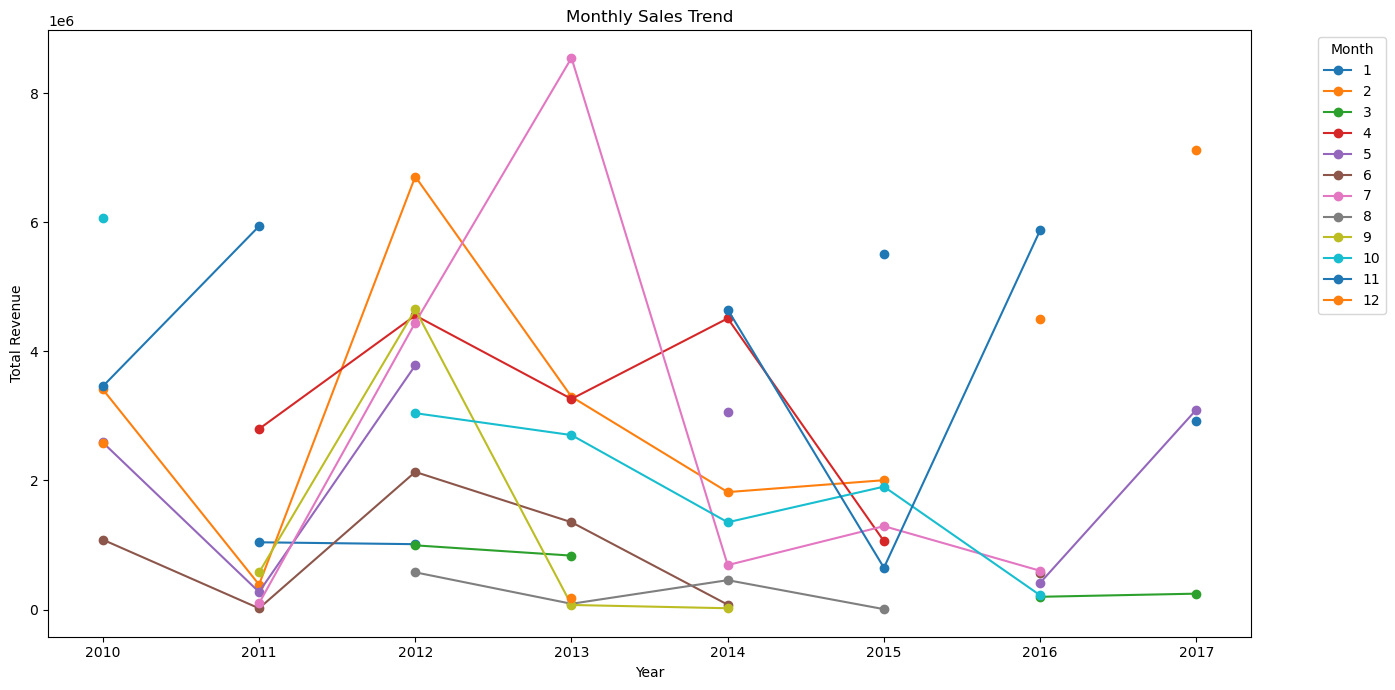

In [20]:
# Plotting the sales trends
plt.figure(figsize=(14, 7))

# Plot monthly sales

monthly_sales_pivot = monthly_sales.pivot(index='Year', columns='Month', values='Total Revenue')
monthly_sales_pivot.plot(ax=plt.gca(), marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

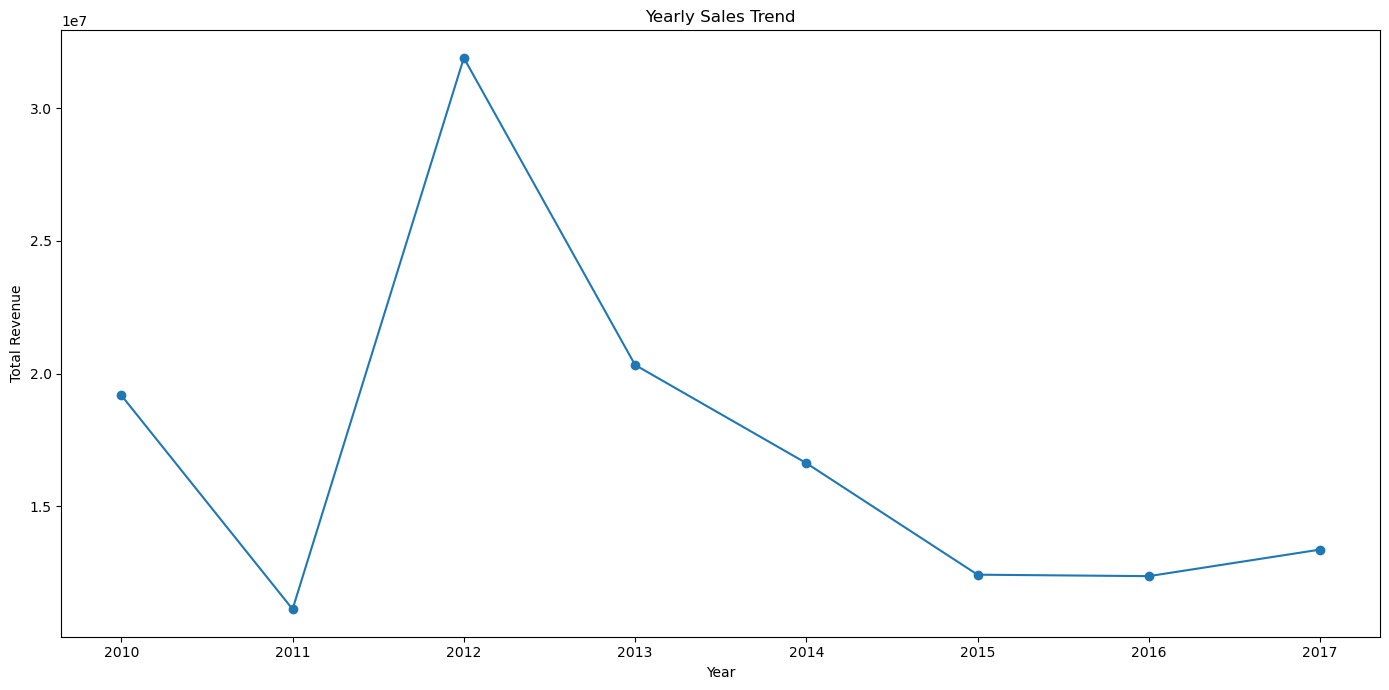

In [21]:
# Plot yearly sales
plt.figure(figsize=(14, 7))
plt.plot(yearly_sales['Year'], yearly_sales['Total Revenue'], marker='o')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

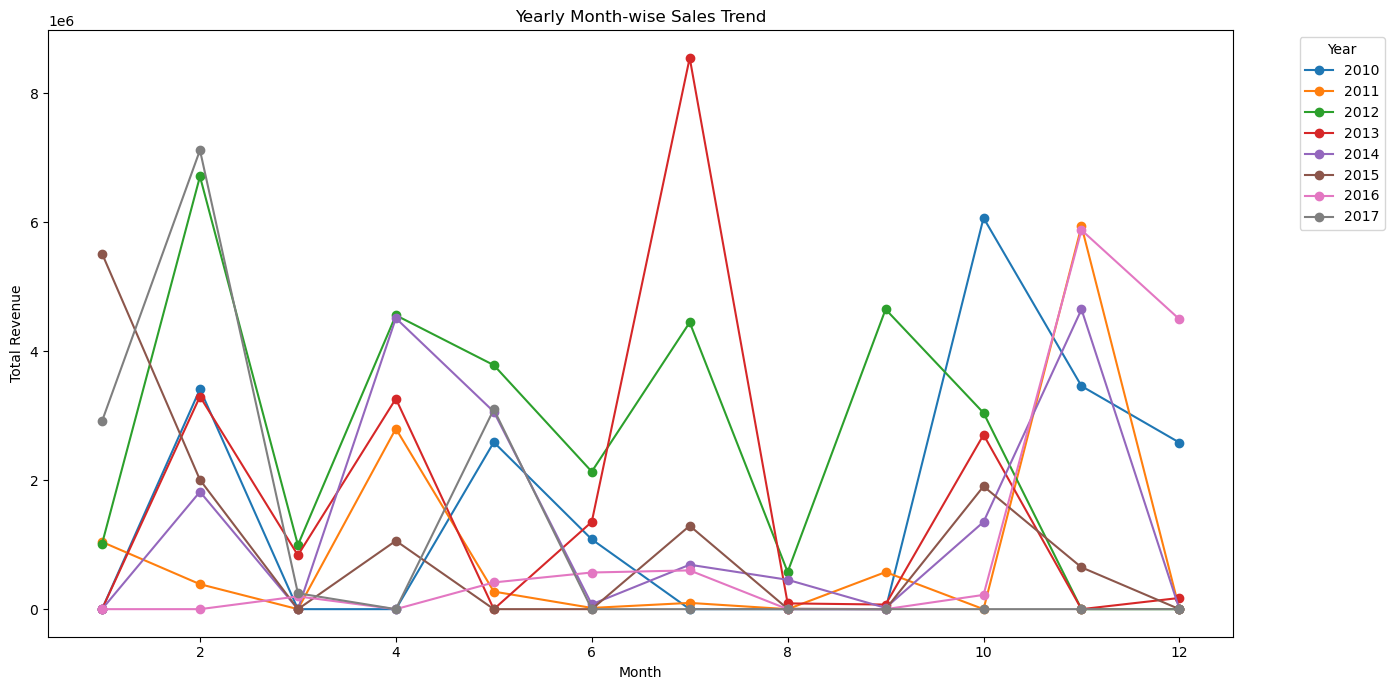

In [22]:
# Plot yearly month-wise sales
plt.figure(figsize=(14, 7))
yearly_monthly_sales.T.plot(ax=plt.gca(), marker='o')
plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [23]:
# Total Revenue
total_revenue = sales['Total Revenue'].sum()

# Average Revenue per Order
average_revenue_per_order = sales['Total Revenue'].mean()

# Monthly Revenue
monthly_revenue = sales.groupby(sales['Order Date'].dt.to_period('M'))['Total Revenue'].sum()

# Average Order Value
average_order_value =sales.groupby('Order ID')['Total Revenue'].sum().mean()

print(f'Total Revenue: ${total_revenue:.2f}')
print(f'Average Revenue per Order: ${average_revenue_per_order:.2f}')
print('Monthly Revenue:')
print(monthly_revenue)
print(f'Average Order Value: ${average_order_value:.2f}')


Total Revenue: $137348768.31
Average Revenue per Order: $1373487.68
Monthly Revenue:
Order Date
2010-02    3410661.12
2010-05    2587973.26
2010-06    1082418.40
2010-10    6064933.75
2010-11    3458252.00
2010-12    2581786.39
2011-01    1042225.35
2011-02     387002.20
2011-04    2798046.49
2011-05     272410.45
2011-06      19103.44
2011-07      97040.64
2011-09     574951.92
2011-11    5938385.58
2012-01    1012884.00
2012-02    6707849.42
2012-03     994765.42
2012-04    4556012.38
2012-05    3782781.82
2012-06    2132075.27
2012-07    4445093.92
2012-08     576782.80
2012-09    4648152.72
2012-10    3042246.77
2013-02    3296425.02
2013-03     835759.10
2013-04    3262562.10
2013-06    1352867.40
2013-07    8545511.20
2013-08      89623.98
2013-09      71253.21
2013-10    2702770.40
2013-12     173676.25
2014-02    1819660.25
2014-04    4510578.10
2014-05    3060338.59
2014-06      75591.66
2014-07     688641.85
2014-08     455479.04
2014-09      20404.71
2014-10    1352370.65
20